In [2]:
pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/content/drive/MyDrive/PCA_output_22july.csv")

In [6]:
df.shape

(845086, 46)

In [7]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,35,36,37,38,39,40,41,42,43,44
0,0,-8.706827,-4.339190,-4.180036,4.212530,0.882604,-0.391934,7.763384,7.204998,-0.499726,...,-0.825974,0.535383,1.194621,-0.188940,-1.618302,0.448730,0.394859,0.068365,-0.367957,-0.288764
1,1,0.512480,2.895134,-7.755316,1.471904,-3.244839,7.041634,1.511138,-5.627420,-1.840403,...,3.140199,-1.372110,1.199871,-2.160086,1.208585,3.552791,4.351152,-0.284990,-1.358902,-0.717233
2,2,-9.623844,-3.837350,0.259920,3.200098,0.916932,-0.789431,6.362865,-3.370701,-0.713113,...,-0.700247,0.642108,1.370315,-0.001497,-1.090686,0.617543,0.170844,-0.146501,-0.498314,-0.526266
3,3,4.177739,0.043942,0.811193,0.786569,-4.303962,7.003255,-1.304247,-2.150142,0.803922,...,2.368025,2.233662,3.673938,4.256667,-0.324745,0.938214,1.886685,0.777780,0.269531,0.725476
4,4,18.448381,-6.148126,-10.818271,0.351719,3.177688,-3.615830,-1.801479,-0.157590,-1.294293,...,2.282110,-1.148650,0.606627,-0.125223,1.268335,2.354189,1.293222,-0.903653,-1.032513,-1.651606


In [8]:
df = df.drop("Unnamed: 0",axis=1)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-8.706827,-4.339190,-4.180036,4.212530,0.882604,-0.391934,7.763384,7.204998,-0.499726,2.654979,...,-0.825974,0.535383,1.194621,-0.188940,-1.618302,0.448730,0.394859,0.068365,-0.367957,-0.288764
1,0.512480,2.895134,-7.755316,1.471904,-3.244839,7.041634,1.511138,-5.627420,-1.840403,2.954020,...,3.140199,-1.372110,1.199871,-2.160086,1.208585,3.552791,4.351152,-0.284990,-1.358902,-0.717233
2,-9.623844,-3.837350,0.259920,3.200098,0.916932,-0.789431,6.362865,-3.370701,-0.713113,-3.942008,...,-0.700247,0.642108,1.370315,-0.001497,-1.090686,0.617543,0.170844,-0.146501,-0.498314,-0.526266
3,4.177739,0.043942,0.811193,0.786569,-4.303962,7.003255,-1.304247,-2.150142,0.803922,2.601226,...,2.368025,2.233662,3.673938,4.256667,-0.324745,0.938214,1.886685,0.777780,0.269531,0.725476
4,18.448381,-6.148126,-10.818271,0.351719,3.177688,-3.615830,-1.801479,-0.157590,-1.294293,1.832637,...,2.282110,-1.148650,0.606627,-0.125223,1.268335,2.354189,1.293222,-0.903653,-1.032513,-1.651606


In [10]:
df = np.array(df)

In [11]:
from minisom import MiniSom

In [112]:
SOM = MiniSom(20,20, 45, sigma=0.5, learning_rate=.1,neighborhood_function='gaussian',activation_distance='cosine',random_seed=101)

In [113]:
SOM.train_batch(df, 845100, verbose=True)


 [ 845100 / 845100 ] 100% - 0:00:00 left 

/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)



 quantization error: 0.6933114783624011


In [114]:
som_shape = (20,20)

In [115]:
# each neuron represents a cluster
winner_coordinates = np.array([SOM.winner(x) for x in df]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [116]:
(np.unique(cluster_index))

array([  2,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  45,  47,  49,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  84,  85,
        86,  87,  91,  93,  94,  95,  96,  97,  98,  99, 100, 101, 103,
       104, 105, 106, 107, 108, 109, 110, 112, 113, 115, 116, 119, 120,
       121, 122, 123, 124, 127, 128, 130, 132, 134, 135, 137, 139, 143,
       145, 147, 151, 152, 156, 159, 160, 168, 169, 171, 172, 173, 176,
       177, 183, 186, 188, 192, 195, 196, 197, 210, 216, 217, 224, 227,
       229, 233, 234, 235, 236, 237, 249, 250, 253, 254, 260, 268, 269,
       272, 273, 275, 276, 280, 281, 282, 287, 288, 289, 290, 291, 293,
       294, 295, 302, 303, 309, 311, 312, 313, 314, 320, 322, 323, 328,
       332, 333, 334, 342, 343, 347, 350, 352, 353, 357, 360, 36

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


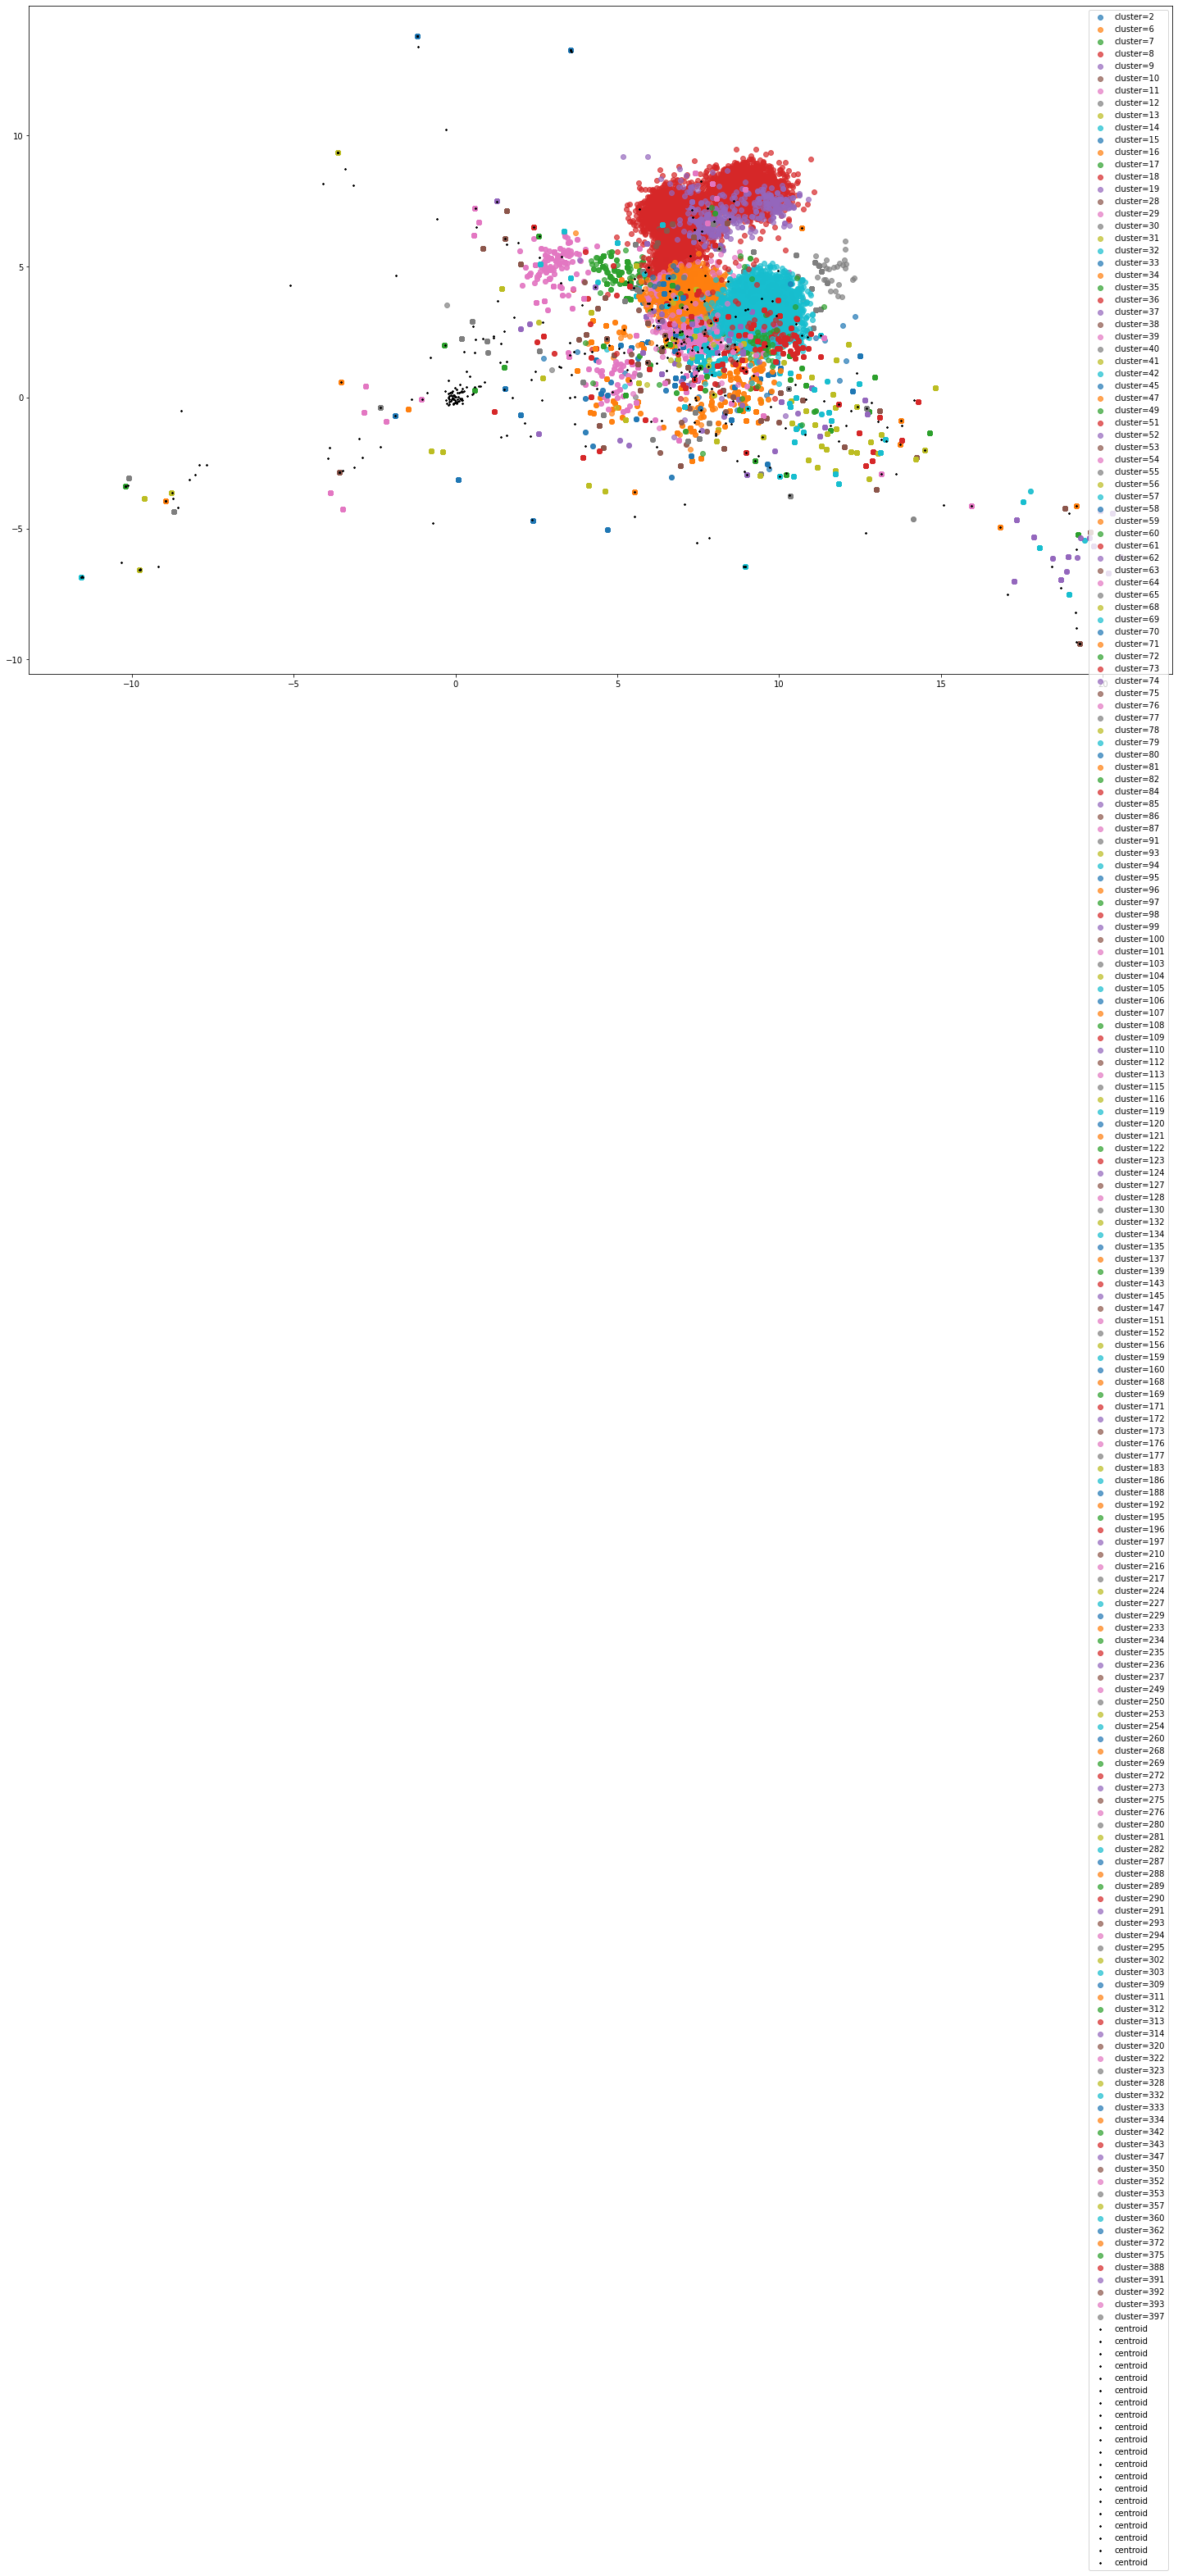

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,15))
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(df[cluster_index == c, 0],df[cluster_index == c, 1] ,label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in SOM.get_weights():
   plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',  s=3, linewidths=15, color='k', label='centroid')
plt.legend();

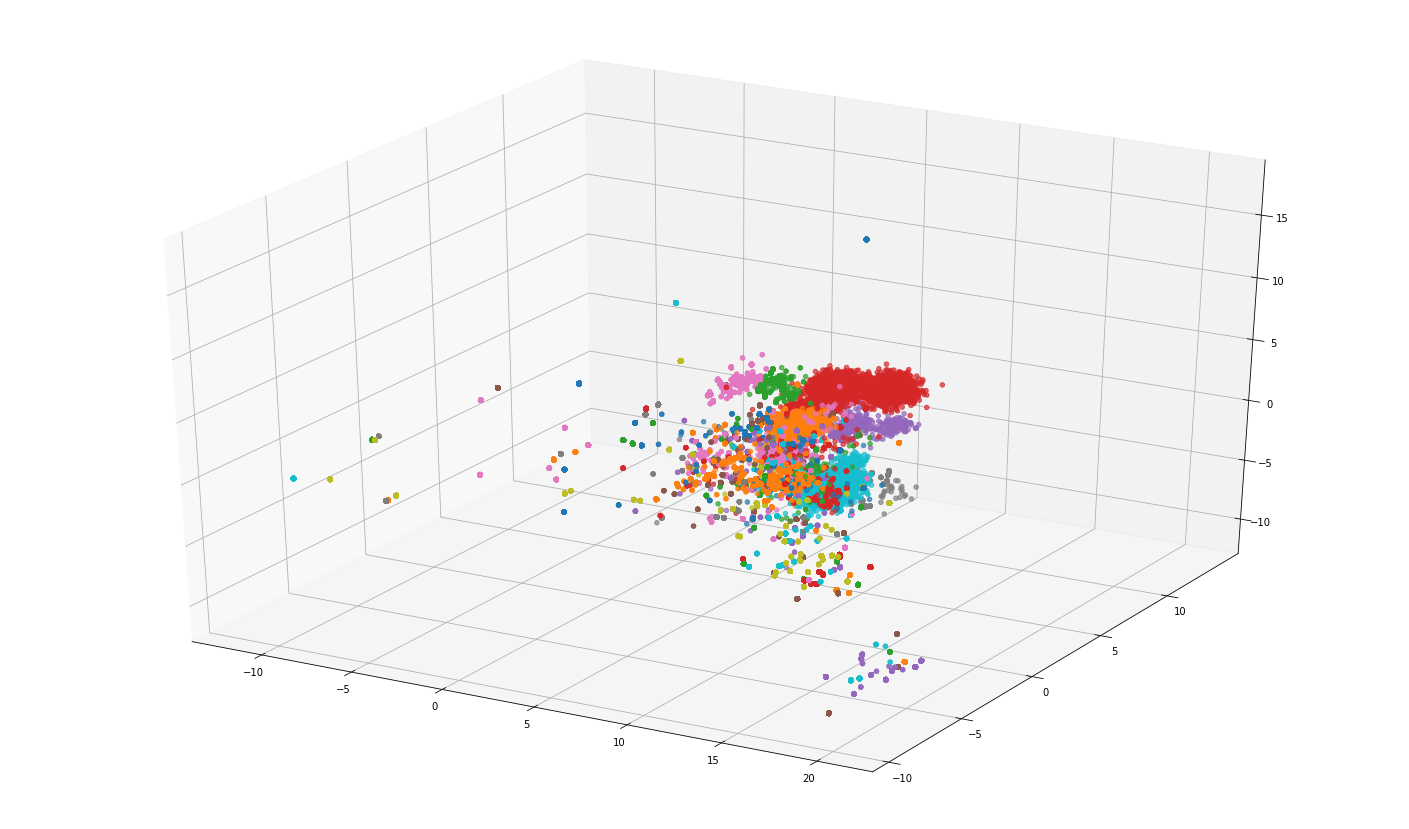

In [118]:
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(111, projection='3d')
for c in np.unique(cluster_index):
  ax.scatter(df[cluster_index == c, 0],df[cluster_index == c, 1],df[cluster_index == c, 2],label='cluster='+str(c), alpha=.7)

In [119]:
for i in np.unique(cluster_index):
 print("cluster no. - > ",i," = ",len(df[cluster_index==i])," templates")

cluster no. - >  2  =  70164  templates
cluster no. - >  6  =  488  templates
cluster no. - >  7  =  1428  templates
cluster no. - >  8  =  3347  templates
cluster no. - >  9  =  1024  templates
cluster no. - >  10  =  1440  templates
cluster no. - >  11  =  1988  templates
cluster no. - >  12  =  484  templates
cluster no. - >  13  =  785  templates
cluster no. - >  14  =  447  templates
cluster no. - >  15  =  485  templates
cluster no. - >  16  =  611  templates
cluster no. - >  17  =  912  templates
cluster no. - >  18  =  11603  templates
cluster no. - >  19  =  3371  templates
cluster no. - >  28  =  952  templates
cluster no. - >  29  =  2416  templates
cluster no. - >  30  =  4784  templates
cluster no. - >  31  =  3536  templates
cluster no. - >  32  =  2536  templates
cluster no. - >  33  =  109  templates
cluster no. - >  34  =  2058  templates
cluster no. - >  35  =  627  templates
cluster no. - >  36  =  193  templates
cluster no. - >  37  =  548  templates
cluster no. - >

In [212]:
for i in np.unique(cluster_index):
 if len(df[cluster_index==i]) <= :
  print("cluster no. - > ",i," = ",len(df[cluster_index==i])," templates")

cluster no. - >  6  =  488  templates
cluster no. - >  12  =  484  templates
cluster no. - >  13  =  785  templates
cluster no. - >  14  =  447  templates
cluster no. - >  15  =  485  templates
cluster no. - >  16  =  611  templates
cluster no. - >  17  =  912  templates
cluster no. - >  28  =  952  templates
cluster no. - >  33  =  109  templates
cluster no. - >  35  =  627  templates
cluster no. - >  36  =  193  templates
cluster no. - >  37  =  548  templates
cluster no. - >  40  =  103  templates
cluster no. - >  41  =  102  templates
cluster no. - >  42  =  165  templates
cluster no. - >  45  =  401  templates
cluster no. - >  49  =  464  templates
cluster no. - >  52  =  1  templates
cluster no. - >  53  =  798  templates
cluster no. - >  56  =  3  templates
cluster no. - >  58  =  154  templates
cluster no. - >  60  =  106  templates
cluster no. - >  61  =  266  templates
cluster no. - >  62  =  270  templates
cluster no. - >  63  =  4  templates
cluster no. - >  64  =  198  tem

In [348]:
arr=[]
for i in np.unique(cluster_index):
 if len(df[cluster_index==i]) <=500:
    arr.append(i)

In [349]:
len(np.unique(cluster_index))

188

In [350]:
data = pd.read_csv("/content/drive/MyDrive/PCA_output_22july.csv")

In [351]:
data["cluster_index"]=pd.Series(cluster_index)

In [352]:
search=pd.read_csv("/content/drive/MyDrive/15AUGUST2022/Output/input.csv_structured.csv")

In [353]:
search=search[1:]

In [354]:
search

,LineId,Pid,Time,Content,EventId,EventTemplate,ParameterList
1,2,0.0,2022-07-21 11:17:01.728692000,pam_unix(cron:session): session opened for use...,521fc916,<*> session) session <*> for user <*>,"['pam_unix(cron', 'opened', 'root by (uid']"
2,3,1.0,2022-07-21 11:17:01.729221000,(root) cmd ( cd / && run-parts --report/etc/cr...,cf1043c5,(root) cmd ( cd / && run-parts --report/etc/cr...,[]
3,4,2.0,2022-07-21 11:17:01.731491000,pam_unix(cron:session): session closed for use...,521fc916,<*> session) session <*> for user <*>,"['pam_unix(cron', 'closed', 'root']"
4,5,3.0,2022-07-21 11:31:49.837471000,starting cleanup of temporary directories...,a2f7f113,<*> cleanup of temporary <*>,"['starting', 'directories']"
5,6,4.0,2022-07-21 11:31:49.847618000,systemd-tmpfiles-clean.service: succeeded.,9a46bf4d,<*> succeeded.,['systemd-tmpfiles-clean.service']
...,...,...,...,...,...,...,...
845082,845083,845081.0,2022-07-21 15:51:29.180422000,removed session .,2b925a84,removed session .,[]
845083,845084,845082.0,2022-07-21 15:51:29.267410000,received disconnect from ... port:: disconnect...,e42dff23,<*> <*> from ... port <*>,"['', 'received disconnect', 'disconnected by u..."
845084,845085,845083.0,2022-07-21 15:51:29.267485000,disconnected from user root ... port,e42dff23,<*> <*> from ... port <*>,[]
845085,845086,845084.0,2022-07-21 15:51:30.000000000,started session of user root.,3952facf,<*> session of user <*>,"['started', 'root']"


In [355]:
search["cluster_index"] = cluster_index

In [356]:
#search[search["cluster_index"]==154]["EventId"].unique()

In [357]:
#search[search["EventId"]=="b01f12d3"]

In [358]:
anomaly=search[search["cluster_index"].isin(arr)]

In [359]:
anomaly.shape

(19252, 8)

In [360]:
anomaly

,LineId,Pid,Time,Content,EventId,EventTemplate,ParameterList,cluster_index
1,2,0.0,2022-07-21 11:17:01.728692000,pam_unix(cron:session): session opened for use...,521fc916,<*> session) session <*> for user <*>,"['pam_unix(cron', 'opened', 'root by (uid']",177
2,3,1.0,2022-07-21 11:17:01.729221000,(root) cmd ( cd / && run-parts --report/etc/cr...,cf1043c5,(root) cmd ( cd / && run-parts --report/etc/cr...,[],280
3,4,2.0,2022-07-21 11:17:01.731491000,pam_unix(cron:session): session closed for use...,521fc916,<*> session) session <*> for user <*>,"['pam_unix(cron', 'closed', 'root']",357
4,5,3.0,2022-07-21 11:31:49.837471000,starting cleanup of temporary directories...,a2f7f113,<*> cleanup of temporary <*>,"['starting', 'directories']",290
6,7,5.0,2022-07-21 11:31:49.847940000,finished cleanup of temporary directories.,a2f7f113,<*> cleanup of temporary <*>,"['finished', 'directories']",290
...,...,...,...,...,...,...,...,...
844133,844134,844132.0,2022-07-21 15:51:19.625723369,at org.springframework.security.web.access.exc...,8709d95d,at <*> ) <*>,['org.springframework.security.web.access.exce...,49
844148,844149,844147.0,2022-07-21 15:51:19.625811329,at org.springframework.security.web.header.hea...,8709d95d,at <*> ) <*>,['org.springframework.security.web.header.head...,69
844153,844154,844152.0,2022-07-21 15:51:19.625856823,at org.springframework.security.web.context.re...,8709d95d,at <*> ) <*>,['org.springframework.security.web.context.req...,12
844174,844175,844173.0,2022-07-21 15:51:19.625961598,at org.apache.catalina.core.standardcontextval...,8709d95d,at <*> ) <*>,['org.apache.catalina.core.standardcontextvalv...,6


In [306]:
len(anomaly["EventId"].unique())

75

In [285]:
deep_false=pd.read_csv("/content/drive/MyDrive/new_filter54.csv")

In [375]:
int_df = pd.merge(anomaly, deep_false, how ='inner', on =['EventId'])

In [286]:
deep_false

,Unnamed: 0,Unnamed: 0.1,LineId,Pid,Time,Content,EventId,EventTemplate,ParameterList,temp,time_stamp
0,361,21818,21819,21817.0,2022-07-21 14:32:59.223000000,"""this request accesses system indices: [.async...",e785dd67,"""this request accesses system indices [.async-...",[],235,2022-07-21 14:32:59.223000000
1,364,21821,21822,21820.0,2022-07-21 14:32:59.375000000,"""[][gc,start ] gc() pause young (concurrent st...",275c94cb,<*> <*> ] gc() pause young (concurrent start) ...,"['', 'gc,start', 'pause']",27,2022-07-21 14:32:59.375000000
2,412,21868,21869,21867.0,2022-07-21 14:33:00.040000000,org.apache.hadoop.hdfs.server.namenode.fseditl...,132adddc,org.apache.hadoop.hdfs.server.namenode.fseditl...,[],15,2022-07-21 14:33:00.040000000
3,416,21873,21874,21872.0,2022-07-21 14:33:00.420148831,""" [info][] watchercache.go : watch channel clo...",b01f12d3,""" [info][] watchercache.go watch channel close...",['calico/resources/v/projectcalico.org/network...,177,2022-07-21 14:33:00.420148831
4,566,22023,22024,22022.0,2022-07-21 14:33:08.078777026,changes in seconds. saving...,e6a2e176,changes in seconds. saving...,[],234,2022-07-21 14:33:08.078777026
5,567,22024,22025,22023.0,2022-07-21 14:33:08.078815543,background saving started by pid,e4433f8d,background saving started by pid,[],230,2022-07-21 14:33:08.078815543
6,568,22025,22026,22024.0,2022-07-21 14:33:08.078832990,db saved on disk,bb263d70,db saved on disk,[],183,2022-07-21 14:33:08.078832990
7,569,22026,22027,22025.0,2022-07-21 14:33:08.078848516,rdb: mb of memory used by copy-on-write,e4b8527f,rdb mb of memory used by copy-on-write,[],231,2022-07-21 14:33:08.078848516
8,607,22064,22065,22063.0,2022-07-21 14:33:09.081580619,background saving terminated with success,caac086b,background saving terminated with success,[],199,2022-07-21 14:33:09.081580619
9,612,22069,22070,22068.0,2022-07-21 14:33:09.490792342,info --- [rker--thread-] c.o.e.p.availabilit...,15f73f7a,info --- <*> c.o.e.p.availabilityindexprocess ...,[],17,2022-07-21 14:33:09.490792342


In [287]:
len(deep_false) # total no. of log lines being validated

54

In [373]:
len(deep_false["EventId"].unique()) # No. of unique log templates within the validation sample

25

In [374]:
a=list(int_df["EventId"].unique())

In [367]:
deep=deep_false[deep_false["EventId"].isin(a)]

In [368]:
len(deep) # No. of outliers detected in the validation sample

49

In [371]:
deep["EventId"].unique() # Array of Outlier Event-Ids in the validation sample

array(['e785dd67', '275c94cb', '132adddc', 'e6a2e176', 'e4433f8d',
       'bb263d70', 'e4b8527f', 'caac086b', '15f73f7a', '96521606',
       'a5a11619', '2bd45845', '7936ba4e', '64cdd05a', 'c4a8a342',
       'e1fb3ee9', 'aa11e8ad', 'cf6900b9', 'aaf144a6', '9b0301ca',
       '0bd4a84b', '9598f986', 'beb3e351'], dtype=object)

In [210]:
b=list(deep["EventId"].unique())

In [211]:
search[search["EventId"].isin(b)]

,LineId,Pid,Time,Content,EventId,EventTemplate,ParameterList,cluster_index
95,96,94.0,2022-07-21 14:04:35.996709000,starting daily apt download activities...,a5a11619,<*> daily apt download <*>,"['starting', 'activities']",75
97,98,96.0,2022-07-21 14:04:36.661239000,finished daily apt download activities.,a5a11619,<*> daily apt download <*>,"['finished', 'activities']",75
764,765,763.0,2022-07-21 14:20:01.459000000,org.apache.hadoop.hdfs.statechange: block* fsy...,e1fb3ee9,org.apache.hadoop.hdfs.statechange block* fsyn...,['/sla-stream/receivedblockmetadata/log--'],342
1048,1049,1047.0,2022-07-21 14:20:24.010000000,"""[][gc,start ] gc() pause young (concurrent st...",275c94cb,<*> <*> ] gc() pause young (concurrent start) ...,"['', 'gc,start', 'pause']",106
1056,1057,1055.0,2022-07-21 14:20:24.022000000,[][gc ] gc() pause young (concurrent start) (g...,275c94cb,<*> <*> ] gc() pause young (concurrent start) ...,"['', 'gc', 'pause) m->m(m) .ms']",106
...,...,...,...,...,...,...,...,...
826082,826083,826081.0,2022-07-21 15:47:36.337948990,-- :: [warning] [pid ] [tid ] [l] [monitoring:...,7936ba4e,-- [warning] [pid ] [tid ] [l] [monitoring ] d...,[],192
828226,828227,828225.0,2022-07-21 15:48:06.967711437,-- :: [warning] [pid ] [tid ] [l] [monitoring:...,7936ba4e,-- [warning] [pid ] [tid ] [l] [monitoring ] d...,[],192
832564,832565,832563.0,2022-07-21 15:49:01.958000000,org.apache.hadoop.hdfs.statechange: block* fsy...,e1fb3ee9,org.apache.hadoop.hdfs.statechange block* fsyn...,['/metric-stream/receivedblockmetadata/log--'],342
837952,837953,837951.0,2022-07-21 15:50:01.401000000,org.apache.hadoop.hdfs.statechange: block* fsy...,e1fb3ee9,org.apache.hadoop.hdfs.statechange block* fsyn...,['/sla-stream/receivedblockmetadata/log--'],342


In [362]:
int_df

,LineId_x,Pid_x,Time_x,Content_x,EventId,EventTemplate_x,ParameterList_x,cluster_index,Unnamed: 0,Unnamed: 0.1,LineId_y,Pid_y,Time_y,Content_y,EventTemplate_y,ParameterList_y,temp,time_stamp
0,96,94.0,2022-07-21 14:04:35.996709000,starting daily apt download activities...,a5a11619,<*> daily apt download <*>,"['starting', 'activities']",75,949,22406,22407,22405.0,2022-07-21 14:33:25.000000000,starting daily apt download activities...,<*> daily apt download <*>,"['starting', 'activities']",164,2022-07-21 14:33:25.000000000
1,96,94.0,2022-07-21 14:04:35.996709000,starting daily apt download activities...,a5a11619,<*> daily apt download <*>,"['starting', 'activities']",75,1175,22632,22633,22631.0,2022-07-21 14:33:36.000000000,started daily apt download activities.,<*> daily apt download <*>,"['started', 'activities']",164,2022-07-21 14:33:36.000000000
2,98,96.0,2022-07-21 14:04:36.661239000,finished daily apt download activities.,a5a11619,<*> daily apt download <*>,"['finished', 'activities']",75,949,22406,22407,22405.0,2022-07-21 14:33:25.000000000,starting daily apt download activities...,<*> daily apt download <*>,"['starting', 'activities']",164,2022-07-21 14:33:25.000000000
3,98,96.0,2022-07-21 14:04:36.661239000,finished daily apt download activities.,a5a11619,<*> daily apt download <*>,"['finished', 'activities']",75,1175,22632,22633,22631.0,2022-07-21 14:33:36.000000000,started daily apt download activities.,<*> daily apt download <*>,"['started', 'activities']",164,2022-07-21 14:33:36.000000000
4,16214,16212.0,2022-07-21 14:29:40.000000000,starting daily apt download activities...,a5a11619,<*> daily apt download <*>,"['starting', 'activities']",75,949,22406,22407,22405.0,2022-07-21 14:33:25.000000000,starting daily apt download activities...,<*> daily apt download <*>,"['starting', 'activities']",164,2022-07-21 14:33:25.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,23372,23370.0,2022-07-21 14:34:03.615585561,com.vistara.service.integrations.integrationse...,beb3e351,com.vistara.service.integrations.integrationse...,[],343,1887,23344,23345,23343.0,2022-07-21 14:34:02.613645347,com.vistara.service.integrations.integrationse...,com.vistara.service.integrations.integrationse...,[],187,2022-07-21 14:34:02.613645347
1789,554658,554656.0,2022-07-21 15:20:33.482781264,com.vistara.service.integrations.integrationse...,beb3e351,com.vistara.service.integrations.integrationse...,[],343,1887,23344,23345,23343.0,2022-07-21 14:34:02.613645347,com.vistara.service.integrations.integrationse...,com.vistara.service.integrations.integrationse...,[],187,2022-07-21 14:34:02.613645347
1790,554659,554657.0,2022-07-21 15:20:33.482809570,com.vistara.service.integrations.integrationse...,beb3e351,com.vistara.service.integrations.integrationse...,[],343,1887,23344,23345,23343.0,2022-07-21 14:34:02.613645347,com.vistara.service.integrations.integrationse...,com.vistara.service.integrations.integrationse...,[],187,2022-07-21 14:34:02.613645347
1791,554660,554658.0,2022-07-21 15:20:33.482827274,com.vistara.service.integrations.integrationse...,beb3e351,com.vistara.service.integrations.integrationse...,[],343,1887,23344,23345,23343.0,2022-07-21 14:34:02.613645347,com.vistara.service.integrations.integrationse...,com.vistara.service.integrations.integrationse...,[],187,2022-07-21 14:34:02.613645347


In [204]:
int_df["EventId"].unique()

array(['132adddc', 'c4a8a342', 'e785dd67', 'aaf144a6', '64cdd05a',
       'e6a2e176', 'e4433f8d', 'e4b8527f', 'caac086b', '96521606',
       'aa11e8ad', 'cf6900b9', '0bd4a84b', '9598f986', 'beb3e351'],
      dtype=object)

In [193]:
int_df

,LineId_x,Pid_x,Time_x,Content_x,EventId,EventTemplate_x,ParameterList_x,cluster_index,Unnamed: 0,Unnamed: 0.1,LineId_y,Pid_y,Time_y,Content_y,EventTemplate_y,ParameterList_y,temp,time_stamp
0,672,670.0,2022-07-21 14:20:00.030000000,org.apache.hadoop.hdfs.server.namenode.fseditl...,132adddc,org.apache.hadoop.hdfs.server.namenode.fseditl...,[],65,412,21868,21869,21867.0,2022-07-21 14:33:00.040000000,org.apache.hadoop.hdfs.server.namenode.fseditl...,org.apache.hadoop.hdfs.server.namenode.fseditl...,[],15,2022-07-21 14:33:00.040000000
1,672,670.0,2022-07-21 14:20:00.030000000,org.apache.hadoop.hdfs.server.namenode.fseditl...,132adddc,org.apache.hadoop.hdfs.server.namenode.fseditl...,[],65,1775,23232,23233,23231.0,2022-07-21 14:34:00.058000000,org.apache.hadoop.hdfs.server.namenode.fseditl...,org.apache.hadoop.hdfs.server.namenode.fseditl...,[],15,2022-07-21 14:34:00.058000000
2,2018,2016.0,2022-07-21 14:21:00.030000000,org.apache.hadoop.hdfs.server.namenode.fseditl...,132adddc,org.apache.hadoop.hdfs.server.namenode.fseditl...,[],65,412,21868,21869,21867.0,2022-07-21 14:33:00.040000000,org.apache.hadoop.hdfs.server.namenode.fseditl...,org.apache.hadoop.hdfs.server.namenode.fseditl...,[],15,2022-07-21 14:33:00.040000000
3,2018,2016.0,2022-07-21 14:21:00.030000000,org.apache.hadoop.hdfs.server.namenode.fseditl...,132adddc,org.apache.hadoop.hdfs.server.namenode.fseditl...,[],65,1775,23232,23233,23231.0,2022-07-21 14:34:00.058000000,org.apache.hadoop.hdfs.server.namenode.fseditl...,org.apache.hadoop.hdfs.server.namenode.fseditl...,[],15,2022-07-21 14:34:00.058000000
4,4680,4678.0,2022-07-21 14:22:00.036000000,org.apache.hadoop.hdfs.server.namenode.fseditl...,132adddc,org.apache.hadoop.hdfs.server.namenode.fseditl...,[],65,412,21868,21869,21867.0,2022-07-21 14:33:00.040000000,org.apache.hadoop.hdfs.server.namenode.fseditl...,org.apache.hadoop.hdfs.server.namenode.fseditl...,[],15,2022-07-21 14:33:00.040000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,23372,23370.0,2022-07-21 14:34:03.615585561,com.vistara.service.integrations.integrationse...,beb3e351,com.vistara.service.integrations.integrationse...,[],343,1887,23344,23345,23343.0,2022-07-21 14:34:02.613645347,com.vistara.service.integrations.integrationse...,com.vistara.service.integrations.integrationse...,[],187,2022-07-21 14:34:02.613645347
718,554658,554656.0,2022-07-21 15:20:33.482781264,com.vistara.service.integrations.integrationse...,beb3e351,com.vistara.service.integrations.integrationse...,[],343,1887,23344,23345,23343.0,2022-07-21 14:34:02.613645347,com.vistara.service.integrations.integrationse...,com.vistara.service.integrations.integrationse...,[],187,2022-07-21 14:34:02.613645347
719,554659,554657.0,2022-07-21 15:20:33.482809570,com.vistara.service.integrations.integrationse...,beb3e351,com.vistara.service.integrations.integrationse...,[],343,1887,23344,23345,23343.0,2022-07-21 14:34:02.613645347,com.vistara.service.integrations.integrationse...,com.vistara.service.integrations.integrationse...,[],187,2022-07-21 14:34:02.613645347
720,554660,554658.0,2022-07-21 15:20:33.482827274,com.vistara.service.integrations.integrationse...,beb3e351,com.vistara.service.integrations.integrationse...,[],343,1887,23344,23345,23343.0,2022-07-21 14:34:02.613645347,com.vistara.service.integrations.integrationse...,com.vistara.service.integrations.integrationse...,[],187,2022-07-21 14:34:02.613645347
